In [1]:
import time
import numpy as np
import pandas as pd

import galsim #install with conda install -c conda_forge galsim

import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.colors as norm
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline #This allows one to build different steps together
from sklearn.preprocessing import StandardScaler, RobustScaler

from tqdm import tqdm 

from pysr import PySRRegressor



In [3]:
df_bulgier_disks = pd.read_csv('Bulgier Disks Dataset_as defined in notebook v13')

In [6]:
df_bulgier_disks.shape

(4302, 33)

In [4]:
X_bulgier_disks = df_bulgier_disks.drop(columns=['GalpropNormHalfRadius', 'BulgeMstar_ratio'])


y_bulgier_disks = df_bulgier_disks.loc[:,'GalpropNormHalfRadius']

In [8]:
# choose the 7 most important features from analysis above to be used for SR modelling

X_bulgier_disks_imp = df_bulgier_disks.loc[:, ['HalopropSpin', 'GalpropNormSigmaBulge', 
                                                'GalpropNormMHI', 'GalpropNormMbulge',
                                                'GalpropNormMstar', 'GalpropNormVdisk',
                                                'GalpropZcold', 'BulgeMstar_ratio']]


y_bulgier_disks_imp = df_bulgier_disks.loc[:, 'GalpropNormHalfRadius']

In [30]:
# choose the Symbolic Regression model; choose the mathematical operations allowed
model_bulgier_disks_imp = PySRRegressor(

    niterations=10,
    
    binary_operators=["+", "*", "pow", "/"] # , "mylogfunc(x,y)=log(1-(x/y))" ],
#     extra_sympy_mappings={'mylogfunc': lambda x, y: log(1-(x/y))},
    
    
    unary_operators=["exp", "square", "cube", "log10_abs"],
#         "inv(x) = 1/x",  # Custom operator (julia syntax)
    
    constraints= {
        "pow": (-1, 1),
        "/": (-1, 4),
#         "sqrt": 5,
    },
    nested_constraints={
        "pow": {"pow": 1, "exp": 0},
#         "square": {"square": 1, "cube": 1, "exp": 0},
#         "cube": {"square": 1, "cube": 1, "exp": 0},
#         "exp": {"square": 1, "cube": 1, "exp": 0},
    },
    
    maxsize=20,
    multithreading=False,
    model_selection="accuracy", # Result is mix of simplicity+accuracy
    loss="loss(x, y) = (x - y)^2"  # Custom loss function (julia syntax)
)

SyntaxError: invalid syntax (2962867397.py, line 10)

In [22]:
start_time = time.time()

model_bulgier_disks_imp.fit(X_bulgier_disks_imp, np.array(y_bulgier_disks_imp))

elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the Bulgier Disks SymbolicRegression fitting: {elapsed_time:.3f} seconds")

/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/pysr/sr.py:1067: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
  Activating project at `~/.julia/environments/pysr-0.9.3`
   Resolving package versions...
  No Changes to `~/.julia/environments/pysr-0.9.3/Project.toml`
  No Changes to `~/.julia/environments/pysr-0.9.3/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/pysr-0.9.3/Project.toml`
  No Changes to `~/.julia/environments/pysr-0.9.3/Manifest.toml`
  No Changes to `~/.julia/environments/pysr-0.9.3/Project.toml`
  No Changes to `~/.julia/environments/pysr-0.9.3/Manifest.toml`


RuntimeError: <PyCall.jlwrap (in a Julia function called from Python)
JULIA: AssertionError: Your configuration is invalid - one of your operators (mylogfunc) is not well-defined over the real line.
Stacktrace:
 [1] test_option_configuration(T::Type, options::Options{Tuple{typeof(+), typeof(*), typeof(SymbolicRegression.CoreModule.OperatorsModule.pow), typeof(/), typeof(mylogfunc)}, Tuple{typeof(exp), typeof(square), typeof(cube), typeof(log10_abs)}, Nothing, Nothing, typeof(loss), Int64})
   @ SymbolicRegression ~/.julia/packages/SymbolicRegression/nlE1i/src/Configure.jl:29
 [2] _EquationSearch(::SymbolicRegression.CoreModule.ProgramConstantsModule.SRDistributed, datasets::Vector{SymbolicRegression.CoreModule.DatasetModule.Dataset{Float32}}; niterations::Int64, options::Options{Tuple{typeof(+), typeof(*), typeof(SymbolicRegression.CoreModule.OperatorsModule.pow), typeof(/), typeof(mylogfunc)}, Tuple{typeof(exp), typeof(square), typeof(cube), typeof(log10_abs)}, Nothing, Nothing, typeof(loss), Int64}, numprocs::Int64, procs::Nothing, runtests::Bool, saved_state::Nothing, addprocs_function::Nothing)
   @ SymbolicRegression ~/.julia/packages/SymbolicRegression/nlE1i/src/SymbolicRegression.jl:385
 [3] EquationSearch(datasets::Vector{SymbolicRegression.CoreModule.DatasetModule.Dataset{Float32}}; niterations::Int64, options::Options{Tuple{typeof(+), typeof(*), typeof(SymbolicRegression.CoreModule.OperatorsModule.pow), typeof(/), typeof(mylogfunc)}, Tuple{typeof(exp), typeof(square), typeof(cube), typeof(log10_abs)}, Nothing, Nothing, typeof(loss), Int64}, numprocs::Int64, procs::Nothing, multithreading::Bool, runtests::Bool, saved_state::Nothing, addprocs_function::Nothing)
   @ SymbolicRegression ~/.julia/packages/SymbolicRegression/nlE1i/src/SymbolicRegression.jl:325
 [4] EquationSearch(X::Matrix{Float32}, y::Matrix{Float32}; niterations::Int64, weights::Nothing, varMap::Vector{String}, options::Options{Tuple{typeof(+), typeof(*), typeof(SymbolicRegression.CoreModule.OperatorsModule.pow), typeof(/), typeof(mylogfunc)}, Tuple{typeof(exp), typeof(square), typeof(cube), typeof(log10_abs)}, Nothing, Nothing, typeof(loss), Int64}, numprocs::Int64, procs::Nothing, multithreading::Bool, runtests::Bool, saved_state::Nothing, addprocs_function::Nothing)
   @ SymbolicRegression ~/.julia/packages/SymbolicRegression/nlE1i/src/SymbolicRegression.jl:269
 [5] #EquationSearch#21
   @ ~/.julia/packages/SymbolicRegression/nlE1i/src/SymbolicRegression.jl:294 [inlined]
 [6] invokelatest(::Any, ::Any, ::Vararg{Any}; kwargs::Base.Pairs{Symbol, Any, NTuple{8, Symbol}, NamedTuple{(:weights, :niterations, :varMap, :options, :numprocs, :multithreading, :saved_state, :addprocs_function), Tuple{Nothing, Int64, Vector{String}, Options{Tuple{typeof(+), typeof(*), typeof(SymbolicRegression.CoreModule.OperatorsModule.pow), typeof(/), typeof(mylogfunc)}, Tuple{typeof(exp), typeof(square), typeof(cube), typeof(log10_abs)}, Nothing, Nothing, typeof(loss), Int64}, Int64, Bool, Nothing, Nothing}}})
   @ Base ./essentials.jl:731
 [7] _pyjlwrap_call(f::Function, args_::Ptr{PyCall.PyObject_struct}, kw_::Ptr{PyCall.PyObject_struct})
   @ PyCall ~/.julia/packages/PyCall/7a7w0/src/callback.jl:32
 [8] pyjlwrap_call(self_::Ptr{PyCall.PyObject_struct}, args_::Ptr{PyCall.PyObject_struct}, kw_::Ptr{PyCall.PyObject_struct})
   @ PyCall ~/.julia/packages/PyCall/7a7w0/src/callback.jl:44>

In [14]:
print(model_bulgier_disks_imp)

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          30.705412   
	1         0.305634                          (HalopropSpin * 948.6997)   
	2         0.609313     ((HalopropSpin * 948.6997) / GalpropNormVdisk)   
	3         0.676294  ((HalopropSpin * 1034.9025) / square(GalpropNo...   
	4         0.118372  (((HalopropSpin * 950.1282) + 4.5606465) / squ...   
	5         0.060896  (((HalopropSpin * 979.3206) + pow(HalopropSpin...   
	6         0.020749  ((HalopropSpin * (979.44867 + square(0.2518545...   
	7         0.033395  (((HalopropSpin * 979.3206) + pow(HalopropSpin...   
	8         0.095640  ((HalopropSpin * (979.44867 + square(pow(-0.27...   
	9         0.028760  ((HalopropSpin * (979.44867 + square((-0.29283...   
	10        0.011396  ((HalopropSpin * (square((-0.29283565 / (Halop...   
	11        0.025929  (((HalopropSpin * (950.1282 * exp(HalopropSpin...   
	12  >>>>

In [15]:
model_bulgier_disks_imp.equations_

,complexity,loss,score,equation,sympy_format,lambda_format
0,1,242.308670,0.000000,30.705412,30.7054120000000,PySRFunction(X=>30.7054120000000)
1,3,131.491680,0.305634,(HalopropSpin * 948.6997),948.6997*HalopropSpin,PySRFunction(X=>948.6997*HalopropSpin)
2,5,38.873695,0.609313,((HalopropSpin * 948.6997) / GalpropNormVdisk),948.6997*HalopropSpin/GalpropNormVdisk,PySRFunction(X=>948.6997*HalopropSpin/GalpropN...
3,6,19.767200,0.676294,((HalopropSpin * 1034.9025) / square(GalpropNo...,1034.9025*HalopropSpin/GalpropNormVdisk**2,PySRFunction(X=>1034.9025*HalopropSpin/Galprop...
4,8,15.600128,0.118372,(((HalopropSpin * 950.1282) + 4.5606465) / squ...,(950.1282*HalopropSpin + 4.5606465)/GalpropNor...,PySRFunction(X=>(950.1282*HalopropSpin + 4.560...
5,10,13.811295,0.060896,(((HalopropSpin * 979.3206) + pow(HalopropSpin...,(979.3206*HalopropSpin + Abs(HalopropSpin)**(-...,PySRFunction(X=>(979.3206*HalopropSpin + Abs(H...
6,11,13.527681,0.020749,((HalopropSpin * (979.44867 + square(0.2518545...,HalopropSpin*(979.44867 + 0.06343068917025/Hal...,PySRFunction(X=>HalopropSpin*(979.44867 + 0.06...
7,12,13.083381,0.033395,(((HalopropSpin * 979.3206) + pow(HalopropSpin...,(979.3206*HalopropSpin + Abs(HalopropSpin)**(-...,PySRFunction(X=>(979.3206*HalopropSpin + Abs(H...
8,13,11.890061,0.095640,((HalopropSpin * (979.44867 + square(pow(-0.27...,HalopropSpin*(0.2754604**(2*GalpropNormVdisk)/...,PySRFunction(X=>HalopropSpin*(0.2754604**(2*Ga...
9,14,11.552978,0.028760,((HalopropSpin * (979.44867 + square((-0.29283...,HalopropSpin*(979.44867 + 0.0857527179109225/(...,PySRFunction(X=>HalopropSpin*(979.44867 + 0.08...


In [16]:
bulgier_disks_eqns = model_bulgier_disks_imp.equations_

In [17]:
# bulgier_disks_eqns.to_csv('Bulgier Disk_equations_n_iter_50')

In [57]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 100)
pd.read_csv('Bulgier Disk_equations_n_iter_700')

,Unnamed: 0,complexity,loss,score,equation,sympy_format,lambda_format
0,0,1,143.918460,0.000000,23.74213,23.7421300000000,PySRFunction(X=>23.7421300000000)
1,1,3,122.783550,0.079412,(HalopropSpin * 450.92166),450.92166*HalopropSpin,PySRFunction(X=>450.92166*HalopropSpin)
2,2,4,118.443210,0.035989,cube(exp(exp(HalopropSpin))),exp(3*exp(HalopropSpin)),PySRFunction(X=>exp(3*exp(HalopropSpin)))
3,3,5,89.464140,0.280596,"(pow(HalopropSpin, GalpropNormVdisk) * 638.72766)",638.72766*Abs(HalopropSpin)**GalpropNormVdisk,PySRFunction(X=>638.72766*Abs(HalopropSpin)**GalpropNormVdisk)
4,4,6,83.510770,0.068862,(HalopropSpin * (653.4583 / cube(GalpropNormVdisk))),653.4583*HalopropSpin/GalpropNormVdisk**3,PySRFunction(X=>653.4583*HalopropSpin/GalpropNormVdisk**3)
5,5,7,64.602295,0.256726,"((HalopropSpin + pow(-0.012780641, GalpropNormSigmaBulge)) * 350.46216)",350.46216*0.012780641**GalpropNormSigmaBulge + 350.46216*HalopropSpin,PySRFunction(X=>350.46216*0.012780641**GalpropNormSigmaBulge + 350.46216*HalopropSpin)
6,6,8,62.163136,0.038488,((HalopropSpin * 319.13135) + exp(1.9855337 / GalpropNormSigmaBulge)),319.13135*HalopropSpin + exp(1.9855337/GalpropNormSigmaBulge),PySRFunction(X=>319.13135*HalopropSpin + exp(1.9855337/GalpropNormSigmaBulge))
7,7,9,53.027878,0.158944,"((HalopropSpin + pow(-0.008755997, GalpropNormSigmaBulge)) * (425.83704 / GalpropNormVdisk))",425.83704*(0.008755997**GalpropNormSigmaBulge + HalopropSpin)/GalpropNormVdisk,PySRFunction(X=>425.83704*(0.008755997**GalpropNormSigmaBulge + HalopropSpin)/GalpropNormVdisk)
8,8,10,51.578716,0.027709,(((HalopropSpin * 392.15372) + exp(1.932153 / GalpropNormSigmaBulge)) / GalpropNormVdisk),(392.15372*HalopropSpin + exp(1.932153/GalpropNormSigmaBulge))/GalpropNormVdisk,PySRFunction(X=>(392.15372*HalopropSpin + exp(1.932153/GalpropNormSigmaBulge))/GalpropNormVdisk)
9,9,11,49.820170,0.034689,((HalopropSpin * (476.19656 / square(GalpropNormVdisk))) + (4.5098724 / cube(GalpropNormSigmaBul...,476.19656*HalopropSpin/GalpropNormVdisk**2 + 4.5098724/GalpropNormSigmaBulge**3,PySRFunction(X=>476.19656*HalopropSpin/GalpropNormVdisk**2 + 4.5098724/GalpropNormSigmaBulge**3)


In [27]:
bulgier_disks_pred = model_bulgier_disks_imp.predict(X_bulgier_disks_imp)

In [19]:
bulgier_disks_pred = pd.DataFrame(bulgier_disks_pred)

NameError: name 'disks_pred' is not defined

In [20]:
# bulgier_disks_pred.to_csv('Predicted_bulgier_disk_sizes_SR_n_iter_50')

In [21]:
print(model_bulgier_disks_imp.sympy())

(979.44867*HalopropSpin + 1.72821520949907*exp(2*exp(-132597.683634735*HalopropSpin**3)))/GalpropNormVdisk**2


In [24]:
# eqn = (476.19*X_bulgier_disks_imp.loc[:,'HalopropSpin'] + 1.72821520949907*np.exp(2*np.exp(-132597.683634735*X_bulgier_disks_imp.loc[:,'HalopropSpin']**3)))/X_bulgier_disks_imp.loc[:, 'GalpropNormVdisk']**2

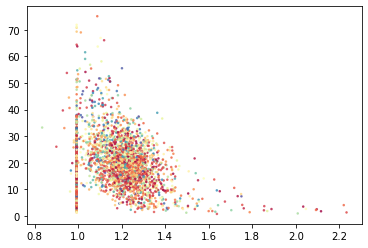

In [24]:
plt.scatter(X_bulgier_disks_imp.loc[:, 'GalpropNormVdisk'], eqn,
            c = df_bulgier_disks['BulgeMstar_ratio'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7)

In [28]:
r2_score_disks=r2_score(y_bulgier_disks_imp, model_bulgier_disks_imp.predict(X_bulgier_disks_imp))

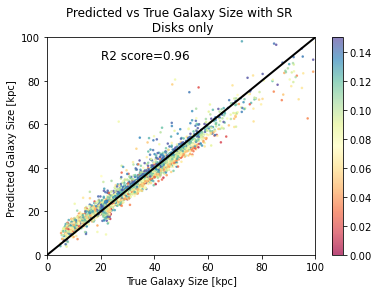

In [30]:
plt.scatter(y_bulgier_disks_imp, model_bulgier_disks_imp.predict(X_disks_imp),
            c = df_bulgier_disks['BulgeMstar_ratio'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7) #,label= label, vmin=-2, vmax=1.0)
plt.text(20, 90, 'R2 score=' + '{:.2f}'.format(r2_score_disks), size=12)
plt.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
plt.axis([0.0,100, 0.0,100])
plt.title('Predicted vs True Galaxy Size with SR \n Bulgier Disks')
plt.xlabel('True Galaxy Size [kpc]')
plt.ylabel('Predicted Galaxy Size [kpc] ')
plt.colorbar()
# plt.savefig('SR_BulgierDisks_predicted vs true gal size.jpeg', dpi=500)
plt.show()

In [34]:
eqn1 = 270.25516*X_bulgier_disks_imp.loc[:,'HalopropSpin'] + 11.172674 #best eqn with n_iter=100

In [35]:
r2_score_disks1=r2_score(y_bulgier_disks_imp, eqn1)

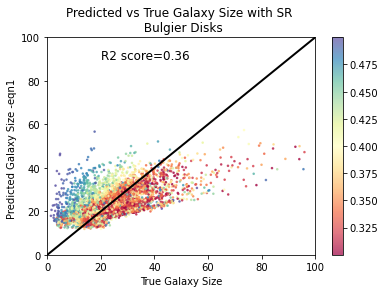

In [36]:
plt.scatter(y_bulgier_disks_imp, eqn1,
            c = df_bulgier_disks['BulgeMstar_ratio'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7) #,label= label, vmin=-2, vmax=1.0)
plt.text(20, 90, 'R2 score=' + '{:.2f}'.format(r2_score_disks1), size=12)
plt.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
plt.axis([0.0,100, 0.0,100])
plt.title('Predicted vs True Galaxy Size with SR \n Bulgier Disks')
plt.xlabel('True Galaxy Size')
plt.ylabel('Predicted Galaxy Size -eqn1 ')
plt.colorbar()
# plt.savefig('SR_BulgierDisks_predicted vs true gal size.jpeg', dpi=500)
plt.show()

In [46]:
eqn2 = 653.45*X_bulgier_disks_imp.loc[:,'HalopropSpin']/(X_bulgier_disks_imp.loc[:, 'GalpropNormVdisk'])**3

In [47]:
r2_score_disks2=r2_score(y_bulgier_disks_imp, eqn2)

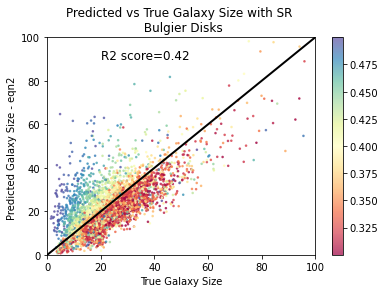

In [48]:
plt.scatter(y_bulgier_disks_imp, eqn2,
            c = df_bulgier_disks['BulgeMstar_ratio'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7) #,label= label, vmin=-2, vmax=1.0)
plt.text(20, 90, 'R2 score=' + '{:.2f}'.format(r2_score_disks2), size=12)
plt.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
plt.axis([0.0,100, 0.0,100])
plt.title('Predicted vs True Galaxy Size with SR \n Bulgier Disks')
plt.xlabel('True Galaxy Size')
plt.ylabel('Predicted Galaxy Size - eqn2 ')
plt.colorbar()
# plt.savefig('SR_BulgierDisks_predicted vs true gal size.jpeg', dpi=500)
plt.show()

In [49]:
eqn3 = 476.19*X_bulgier_disks_imp.loc[:,'HalopropSpin']/(X_bulgier_disks_imp.loc[:, 'GalpropNormVdisk'])**2

In [50]:
r2_score_disks3=r2_score(y_bulgier_disks_imp, eqn3)

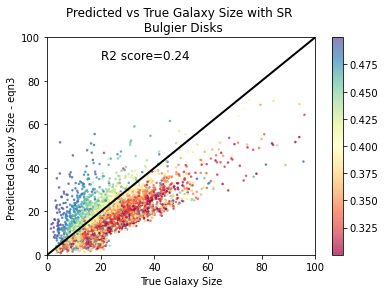

In [51]:
plt.scatter(y_bulgier_disks_imp, eqn3,
            c = df_bulgier_disks['BulgeMstar_ratio'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7) #,label= label, vmin=-2, vmax=1.0)
plt.text(20, 90, 'R2 score=' + '{:.2f}'.format(r2_score_disks3), size=12)
plt.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
plt.axis([0.0,100, 0.0,100])
plt.title('Predicted vs True Galaxy Size with SR \n Bulgier Disks')
plt.xlabel('True Galaxy Size')
plt.ylabel('Predicted Galaxy Size - eqn3 ')
plt.colorbar()
# plt.savefig('SR_BulgierDisks_predicted vs true gal size.jpeg', dpi=500)
plt.show()

In [52]:
# the best eqn from n_iter=700 is 638.72766*Abs(HalopropSpin)**GalpropNormVdisk 
eqn4 = 638.72766*np.abs(X_bulgier_disks_imp.loc[:,'HalopropSpin'])**X_bulgier_disks_imp.loc[:, 'GalpropNormVdisk']

In [53]:
r2_score_disks4=r2_score(y_bulgier_disks_imp, eqn4)

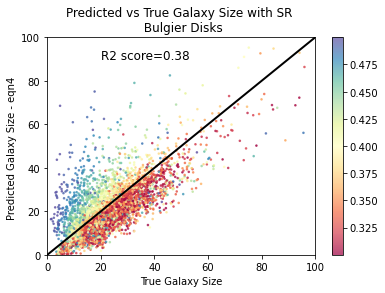

In [54]:
plt.scatter(y_bulgier_disks_imp, eqn4,
            c = df_bulgier_disks['BulgeMstar_ratio'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7) #,label= label, vmin=-2, vmax=1.0)
plt.text(20, 90, 'R2 score=' + '{:.2f}'.format(r2_score_disks4), size=12)
plt.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
plt.axis([0.0,100, 0.0,100])
plt.title('Predicted vs True Galaxy Size with SR \n Bulgier Disks')
plt.xlabel('True Galaxy Size')
plt.ylabel('Predicted Galaxy Size - eqn4 ')
plt.colorbar()
# plt.savefig('SR_BulgierDisks_predicted vs true gal size.jpeg', dpi=500)
plt.show()

In [59]:
# the best eqn for Bulgier Disks from n_iter=2000, time=2200seconds is the 11th equation of 'Bulgier Disk_equations_n_iter_2000' dataset:
# GalpropNormMstar*(217.71115*Abs(GalpropNormMbulge)**GalpropNormSigmaBulge + 
# + 217.71115*Abs(HalopropSpin)**GalpropNormVdisk)/GalpropNormMbulge

eqn5 = df_bulgier_disks['GalpropNormMstar']*(217.71115*np.abs(df_bulgier_disks['GalpropNormMbulge'])**df_bulgier_disks['GalpropNormSigmaBulge'] + 217.71115*np.abs(df_bulgier_disks['HalopropSpin'])**df_bulgier_disks['GalpropNormVdisk'])/df_bulgier_disks['GalpropNormMbulge']

In [60]:
r2_score_disks5=r2_score(y_bulgier_disks_imp, eqn5)

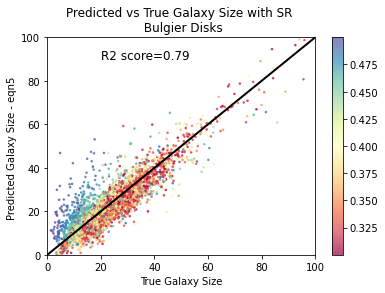

In [61]:
plt.scatter(y_bulgier_disks_imp, eqn5,
            c = df_bulgier_disks['BulgeMstar_ratio'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7) #,label= label, vmin=-2, vmax=1.0)
plt.text(20, 90, 'R2 score=' + '{:.2f}'.format(r2_score_disks5), size=12)
plt.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
plt.axis([0.0,100, 0.0,100])
plt.title('Predicted vs True Galaxy Size with SR \n Bulgier Disks')
plt.xlabel('True Galaxy Size')
plt.ylabel('Predicted Galaxy Size - eqn5 ')
plt.colorbar()
# plt.savefig('SR_BulgierDisks_predicted vs true gal size.jpeg', dpi=500)
plt.show()

In [62]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 100)
pd.read_csv('Bulgier Disk_equations_n_iter_2000')

,Unnamed: 0,complexity,loss,score,equation,sympy_format,lambda_format
0,0,1,143.918460,0.000000,23.74213,23.7421300000000,PySRFunction(X=>23.7421300000000)
1,1,3,122.783550,0.079412,(HalopropSpin * 450.9205),450.9205*HalopropSpin,PySRFunction(X=>450.9205*HalopropSpin)
2,2,4,118.443210,0.035989,cube(exp(exp(HalopropSpin))),exp(3*exp(HalopropSpin)),PySRFunction(X=>exp(3*exp(HalopropSpin)))
3,3,5,89.464140,0.280596,"(pow(HalopropSpin, GalpropNormVdisk) * 638.7268)",638.7268*Abs(HalopropSpin)**GalpropNormVdisk,PySRFunction(X=>638.7268*Abs(HalopropSpin)**GalpropNormVdisk)
4,4,6,83.510770,0.068862,(HalopropSpin * (653.4471 / cube(GalpropNormVdisk))),653.4471*HalopropSpin/GalpropNormVdisk**3,PySRFunction(X=>653.4471*HalopropSpin/GalpropNormVdisk**3)
5,5,7,66.621895,0.225942,((HalopropSpin * 289.8571) + (11.000176 / GalpropNormSigmaBulge)),289.8571*HalopropSpin + 11.000176/GalpropNormSigmaBulge,PySRFunction(X=>289.8571*HalopropSpin + 11.000176/GalpropNormSigmaBulge)
6,6,8,62.779594,0.059403,((HalopropSpin * 323.36023) + (7.996022 / square(GalpropNormSigmaBulge))),323.36023*HalopropSpin + 7.996022/GalpropNormSigmaBulge**2,PySRFunction(X=>323.36023*HalopropSpin + 7.996022/GalpropNormSigmaBulge**2)
7,7,9,55.610250,0.121263,(((HalopropSpin * 368.87427) + (10.054992 / GalpropNormSigmaBulge)) / GalpropNormVdisk),(368.87427*HalopropSpin + 10.054992/GalpropNormSigmaBulge)/GalpropNormVdisk,PySRFunction(X=>(368.87427*HalopropSpin + 10.054992/GalpropNormSigmaBulge)/GalpropNormVdisk)
8,8,10,51.856740,0.069883,(((HalopropSpin * 415.96936) + (5.2335258 / cube(GalpropNormSigmaBulge))) / GalpropNormVdisk),(415.96936*HalopropSpin + 5.2335258/GalpropNormSigmaBulge**3)/GalpropNormVdisk,PySRFunction(X=>(415.96936*HalopropSpin + 5.2335258/GalpropNormSigmaBulge**3)/GalpropNormVdisk)
9,9,11,47.162205,0.094892,"(((pow(HalopropSpin, GalpropNormVdisk) * 178.17815) + 2.8380928) * (GalpropNormMstar / GalpropNo...",GalpropNormMstar*(178.17815*Abs(HalopropSpin)**GalpropNormVdisk + 2.8380928)/GalpropNormMbulge,PySRFunction(X=>GalpropNormMstar*(178.17815*Abs(HalopropSpin)**GalpropNormVdisk + 2.8380928)/Gal...
